## Decision Tree, Random Forest, XGBoost Models on Diff Data
USA World Series Results,
Run on "Diff" data

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [117]:
#Import Data - only want USA matches
df = pd.read_csv('../data/output/final_diffs_all.csv')
df.head()

,Opp,Tournament,Poss_Time_Diff,Score_Diff,Conv_Diff,Tries_Diff,Passes_Diff,Contestable_KO_Win_pct_Diff,PenFK_Against_Diff,RuckMaul_Diff,Ruck_Win_pct_Diff,Cards_diff,Lineout_Win_Pct_Diff,Scrum_Win_Pct_Diff
0,AUSTRALIA,2015_Cape_Town,13.966480,-10.638298,-14.285714,0.250000,25.925926,-50.000000,0.000000,0.000000,0.083333,50.0,0.333333,1.0
1,WALES,2015_Cape_Town,7.471264,15.555556,14.285714,0.083333,27.868852,25.000000,-20.000000,-100.000000,0.250000,0.0,-1.000000,0.0
2,KENYA,2015_Cape_Town,-33.136095,-44.444444,-33.333333,-0.750000,-10.638298,-16.666667,66.666667,60.000000,-0.550000,0.0,-1.000000,0.0
3,NEW ZEALAND,2015_Cape_Town,51.758794,33.333333,33.333333,0.000000,76.119403,-75.000000,-50.000000,-100.000000,0.250000,0.0,0.000000,-1.0
4,FIJI,2015_Cape_Town,12.880562,-20.833333,-25.000000,0.266667,38.461538,-66.666667,-33.333333,-33.333333,0.208333,0.0,-1.000000,0.0


In [118]:
# Replace NaN's with zero
df.fillna(value=0, inplace=True)

In [119]:
# create result label: change from 1,0,2 to win, loss, tie
# if 'Score_Diff' is > 0 = win, if < 0, else tie
def createResult(x):
    if x > 0:
        return 1
    elif x < 0:
        return 0
    elif x == 0:
        return 2

df.loc[:,'Result'] = df.loc[:,'Score_Diff'].apply(createResult)

In [120]:
df.head()

,Opp,Tournament,Poss_Time_Diff,Score_Diff,Conv_Diff,Tries_Diff,Passes_Diff,Contestable_KO_Win_pct_Diff,PenFK_Against_Diff,RuckMaul_Diff,Ruck_Win_pct_Diff,Cards_diff,Lineout_Win_Pct_Diff,Scrum_Win_Pct_Diff,Result
0,AUSTRALIA,2015_Cape_Town,13.966480,-10.638298,-14.285714,0.250000,25.925926,-50.000000,0.000000,0.000000,0.083333,50.0,0.333333,1.0,0
1,WALES,2015_Cape_Town,7.471264,15.555556,14.285714,0.083333,27.868852,25.000000,-20.000000,-100.000000,0.250000,0.0,-1.000000,0.0,1
2,KENYA,2015_Cape_Town,-33.136095,-44.444444,-33.333333,-0.750000,-10.638298,-16.666667,66.666667,60.000000,-0.550000,0.0,-1.000000,0.0,0
3,NEW ZEALAND,2015_Cape_Town,51.758794,33.333333,33.333333,0.000000,76.119403,-75.000000,-50.000000,-100.000000,0.250000,0.0,0.000000,-1.0,1
4,FIJI,2015_Cape_Town,12.880562,-20.833333,-25.000000,0.266667,38.461538,-66.666667,-33.333333,-33.333333,0.208333,0.0,-1.000000,0.0,0


In [121]:
df.Contestable_KO_Win_pct_Diff.describe()

count    156.000000
mean       3.650794
std       45.643028
min     -166.666667
25%      -25.000000
50%        0.000000
75%       33.333333
max      133.333333
Name: Contestable_KO_Win_pct_Diff, dtype: float64

In [122]:
df.Contestable_KO_Win_pct_Diff

0      -50.000000
1       25.000000
2      -16.666667
3      -75.000000
4      -66.666667
5       50.000000
6      -50.000000
7      -50.000000
8      -25.000000
9      -16.666667
10     -60.000000
11      23.809524
12     -66.666667
13      40.000000
14     -46.666667
15     -40.000000
16     -50.000000
17      66.666667
18       0.000000
19      57.142857
20       0.000000
21     -50.000000
22      10.000000
23      16.666667
24     -33.333333
25       0.000000
26      33.333333
27      50.000000
28     -66.666667
29      10.000000
          ...    
126      0.000000
127     32.142857
128    -10.000000
129     41.666667
130    -25.000000
131    100.000000
132    100.000000
133     66.666667
134     25.000000
135     16.666667
136    100.000000
137    -16.666667
138      0.000000
139    -33.333333
140     20.000000
141    -66.666667
142     33.333333
143     -8.333333
144    -33.333333
145    -50.000000
146    -41.666667
147     66.666667
148    -40.000000
149     40.000000
150      0

In [123]:
#Create columns for KO win % bands based on Contestable_KO_Win_pct_Diff
# Tmp DF to hold values
tmp = pd.DataFrame(columns=['-175 : -150', '-149 : -125', '-124 : -100', '-99 : -75', '-74 : -25', '-24 : -1', '0 : 25', '26 : 50', '51 : 75', '76 : 100', '101 : 125', '126 : 150'])

#Iterate through rows and create classification for KO Win%
for index, row in df.iterrows():
    
    if row['Contestable_KO_Win_pct_Diff'] > -175.0 and row['Contestable_KO_Win_pct_Diff'] <= -150.0:
        bin0 = row['-175 : -150'] = float(-1.50*50)
        bin1 = row['-149 : -125'] = float(0)
        bin2 = row['-124 : -100'] = float(0)
        bin3 = row['-99 : -75'] = float(0)
        bin4 = row['-74 : -25'] = float(0)
        bin5 = row['-24 : -1'] = float(0)
        bin6 = row['0 : 25'] = float(0)
        bin7 = row['26 : 50'] = float(0)
        bin8 = row['51 : 75'] = float(0)
        bin9 = row['76 : 100'] = float(0)
        bin10 = row['101 : 125'] = float(0)
        bin11 = row['126 : 150'] = float(0)
        
    elif row['Contestable_KO_Win_pct_Diff'] > -150.0 and row['Contestable_KO_Win_pct_Diff'] <= -125.0:
        bin0 = row['-175 : -150'] = float(0)
        bin1 = row['-149 : -125'] = float(-1.25*50)
        bin2 = row['-124 : -100'] = float(0)
        bin3 = row['-99 : -75'] = float(0)
        bin4 = row['-74 : -25'] = float(0)
        bin5 = row['-24 : -1'] = float(0)
        bin6 = row['0 : 25'] = float(0)
        bin7 = row['26 : 50'] = float(0)
        bin8 = row['51 : 75'] = float(0)
        bin9 = row['76 : 100'] = float(0)
        bin10 = row['101 : 125'] = float(0)
        bin11 = row['126 : 150'] = float(0)  
      
    elif row['Contestable_KO_Win_pct_Diff'] > -125.0 and row['Contestable_KO_Win_pct_Diff'] <= -100.0:
        bin0 = row['-175 : -150'] = float(0)
        bin1 = row['-149 : -125'] = float(0)
        bin2 = row['-124 : -100'] = float(-1.00*50)
        bin3 = row['-99 : -75'] = float(0)
        bin4 = row['-74 : -25'] = float(0)
        bin5 = row['-24 : -1'] = float(0)
        bin6 = row['0 : 25'] = float(0)
        bin7 = row['26 : 50'] = float(0)
        bin8 = row['51 : 75'] = float(0)
        bin9 = row['76 : 100'] = float(0)
        bin10 = row['101 : 125'] = float(0)
        bin11 = row['126 : 150'] = float(0)         
         
    elif row['Contestable_KO_Win_pct_Diff'] > -100.0 and row['Contestable_KO_Win_pct_Diff'] <= -75.0:
        bin0 = row['-175 : -150'] = float(0)
        bin1 = row['-149 : -125'] = float(0)
        bin2 = row['-124 : -100'] = float(0)
        bin3 = row['-99 : -75'] = float(-0.75*50)
        bin4 = row['-74 : -25'] = float(0)
        bin5 = row['-24 : -1'] = float(0)
        bin6 = row['0 : 25'] = float(0)
        bin7 = row['26 : 50'] = float(0)
        bin8 = row['51 : 75'] = float(0)
        bin9 = row['76 : 100'] = float(0)
        bin10 = row['101 : 125'] = float(0)
        bin11 = row['126 : 150'] = float(0)        
          
    elif row['Contestable_KO_Win_pct_Diff'] > -75.0 and row['Contestable_KO_Win_pct_Diff'] <= -25.0:
        bin0 = row['-175 : -150'] = float(0)
        bin1 = row['-149 : -125'] = float(0)
        bin2 = row['-124 : -100'] = float(0)
        bin3 = row['-99 : -75'] = float(0)
        bin4 = row['-74 : -25'] = float(-0.25*50)
        bin5 = row['-24 : -1'] = float(0)
        bin6 = row['0 : 25'] = float(0)
        bin7 = row['26 : 50'] = float(0)
        bin8 = row['51 : 75'] = float(0)
        bin9 = row['76 : 100'] = float(0)
        bin10 = row['101 : 125'] = float(0)
        bin11 = row['126 : 150'] = float(0)        
          
    elif row['Contestable_KO_Win_pct_Diff'] > -25.0 and row['Contestable_KO_Win_pct_Diff'] <= -1.0:
        bin0 = row['-175 : -150'] = float(0)
        bin1 = row['-149 : -125'] = float(0)
        bin2 = row['-124 : -100'] = float(0)
        bin3 = row['-99 : -75'] = float(0)
        bin4 = row['-74 : -25'] = float(0)
        bin5 = row['-24 : -1'] = float(-0.10*50)
        bin6 = row['0 : 25'] = float(0)
        bin7 = row['26 : 50'] = float(0)
        bin8 = row['51 : 75'] = float(0)
        bin9 = row['76 : 100'] = float(0)
        bin10 = row['101 : 125'] = float(0)
        bin11 = row['126 : 150'] = float(0)          
        
    elif row['Contestable_KO_Win_pct_Diff'] >= 0 and row['Contestable_KO_Win_pct_Diff'] <= 25.0:
        bin0 = row['-175 : -150'] = float(0)
        bin1 = row['-149 : -125'] = float(0)
        bin2 = row['-124 : -100'] = float(0)
        bin3 = row['-99 : -75'] = float(0)
        bin4 = row['-74 : -25'] = float(0)
        bin5 = row['-24 : -1'] = float(0)
        bin6 = row['0 : 25'] = float(0.25*50)
        bin7 = row['26 : 50'] = float(0)
        bin8 = row['51 : 75'] = float(0)
        bin9 = row['76 : 100'] = float(0)
        bin10 = row['101 : 125'] = float(0)
        bin11 = row['126 : 150'] = float(0)

    elif row['Contestable_KO_Win_pct_Diff'] > 25.0 and row['Contestable_KO_Win_pct_Diff'] <= 50.0:
        bin0 = row['-175 : -150'] = float(0)
        bin1 = row['-149 : -125'] = float(0)
        bin2 = row['-124 : -100'] = float(0)
        bin3 = row['-99 : -75'] = float(0)
        bin4 = row['-74 : -25'] = float(0)
        bin5 = row['-24 : -1'] = float(0)
        bin6 = row['0 : 25'] = float(0)
        bin7 = row['26 : 50'] = float(0.50*50)
        bin8 = row['51 : 75'] = float(0)
        bin9 = row['76 : 100'] = float(0)
        bin10 = row['101 : 125'] = float(0)
        bin11 = row['126 : 150'] = float(0)

    elif row['Contestable_KO_Win_pct_Diff'] > 50.0 and row['Contestable_KO_Win_pct_Diff'] <= 75.0:
        bin0 = row['-175 : -150'] = float(0)
        bin1 = row['-149 : -125'] = float(0)
        bin2 = row['-124 : -100'] = float(0)
        bin3 = row['-99 : -75'] = float(0)
        bin4 = row['-74 : -25'] = float(0)
        bin5 = row['-24 : -1'] = float(0)
        bin6 = row['0 : 25'] = float(0)
        bin7 = row['26 : 50'] = float(0)
        bin8 = row['51 : 75'] = float(0.75*50)
        bin9 = row['76 : 100'] = float(0)
        bin10 = row['101 : 125'] = float(0)
        bin11 = row['126 : 150'] = float(0)

    elif row['Contestable_KO_Win_pct_Diff'] > 75.0 and row['Contestable_KO_Win_pct_Diff'] <= 100.0:
        #zero = row['0'] = float(0)
        bin0 = row['-175 : -150'] = float(0)
        bin1 = row['-149 : -125'] = float(0)
        bin2 = row['-124 : -100'] = float(0)
        bin3 = row['-99 : -75'] = float(0)
        bin4 = row['-74 : -25'] = float(0)
        bin5 = row['-24 : -1'] = float(0)
        bin6 = row['0 : 25'] = float(0)
        bin7 = row['26 : 50'] = float(0)
        bin8 = row['51 : 75'] = float(0)
        bin9 = row['76 : 100'] = float(1.00*50)
        bin10 = row['101 : 125'] = float(0)
        bin11 = row['126 : 150'] = float(0)

    elif row['Contestable_KO_Win_pct_Diff'] > 100.0 and row['Contestable_KO_Win_pct_Diff'] <= 125.0:
        bin0 = row['-175 : -150'] = float(0)
        bin1 = row['-149 : -125'] = float(0)
        bin2 = row['-124 : -100'] = float(0)
        bin3 = row['-99 : -75'] = float(0)
        bin4 = row['-74 : -25'] = float(0)
        bin5 = row['-24 : -1'] = float(0)
        bin6 = row['0 : 25'] = float(0)
        bin7 = row['26 : 50'] = float(0)
        bin8 = row['51 : 75'] = float(0)
        bin9 = row['76 : 100'] = float(0)
        bin10 = row['101 : 125'] = float(1.25*50)
        bin11 = row['126 : 150'] = float(0)        
        

    elif row['Contestable_KO_Win_pct_Diff'] > 125.0 and row['Contestable_KO_Win_pct_Diff'] <= 150.0:
        #zero = row['0'] = float(0)
        bin0 = row['-175 : -150'] = float(0)
        bin1 = row['-149 : -125'] = float(0)
        bin2 = row['-124 : -100'] = float(0)
        bin3 = row['-99 : -75'] = float(0)
        bin4 = row['-74 : -25'] = float(0)
        bin5 = row['-24 : -1'] = float(0)
        bin6 = row['0 - 25'] = float(0)
        bin7 = row['26 - 50'] = float(0)
        bin8 = row['51 - 75'] = float(0)
        bin9 = row['76 - 100'] = float(0)
        bin10 = row['101 - 125'] = float(0)
        bin11 = row['126 - 150'] = float(1.50*50) 
        
    tmp.loc[index] = (bin0, bin1, bin2, bin3, bin4, bin5, bin6, bin7, bin8, bin9, bin10, bin11)
    
#df.info()
#type(df.Result[1])
df = pd.concat([df, tmp], axis=1)

df.to_csv("../data/output/matchdata_ko_bands.csv", header=True, index=False)

#print(list(df.columns))
# ['Team', 'Date', 'Tournament', 'Match', 'Possession Time', 'Scores', 'Tries', 'Conversions', 'Passes', 'Contestable_KO_Win_pct_Diff', 'Pens_Frees Against', 'Ruck_Maul', 'Yellow_Red Cards', 'TurnoversConceded', 'Ruck_retention', 'Lineout_Win_Pct', 'Scrum_Win_Pct', 'Result', '0', '0 - 25', '25 - 50', '50 - 75', '75 - 100']
df

,Opp,Tournament,Poss_Time_Diff,Score_Diff,Conv_Diff,Tries_Diff,Passes_Diff,Contestable_KO_Win_pct_Diff,PenFK_Against_Diff,RuckMaul_Diff,...,-124 : -100,-99 : -75,-74 : -25,-24 : -1,0 : 25,26 : 50,51 : 75,76 : 100,101 : 125,126 : 150
0,AUSTRALIA,2015_Cape_Town,13.966480,-10.638298,-14.285714,0.250000,25.925926,-50.000000,0.000000,0.000000,...,0.0,0.0,-12.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,WALES,2015_Cape_Town,7.471264,15.555556,14.285714,0.083333,27.868852,25.000000,-20.000000,-100.000000,...,0.0,0.0,0.0,0.0,12.5,0.0,0.0,0.0,0.0,0.0
2,KENYA,2015_Cape_Town,-33.136095,-44.444444,-33.333333,-0.750000,-10.638298,-16.666667,66.666667,60.000000,...,0.0,0.0,0.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NEW ZEALAND,2015_Cape_Town,51.758794,33.333333,33.333333,0.000000,76.119403,-75.000000,-50.000000,-100.000000,...,0.0,-37.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,FIJI,2015_Cape_Town,12.880562,-20.833333,-25.000000,0.266667,38.461538,-66.666667,-33.333333,-33.333333,...,0.0,0.0,-12.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,PORTUGAL,2015_Cape_Town,26.136364,76.271186,77.777778,-0.250000,46.341463,50.000000,50.000000,33.333333,...,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0
6,FRANCE,2015_Dubai,-12.359551,-10.638298,-14.285714,0.250000,5.714286,-50.000000,60.000000,33.333333,...,0.0,0.0,-12.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,NEW ZEALAND,2015_Dubai,-29.189189,7.692308,0.000000,0.500000,-48.837209,-50.000000,20.000000,0.000000,...,0.0,0.0,-12.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,SOUTH AFRICA,2015_Dubai,-1.736973,5.000000,0.000000,0.333333,0.000000,-25.000000,-100.000000,-100.000000,...,0.0,0.0,-12.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,ENGLAND,2015_Dubai,5.483029,-11.627907,-14.285714,0.166667,20.000000,-16.666667,20.000000,25.000000,...,0.0,0.0,0.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
df.info()
list(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 27 columns):
Opp                            156 non-null object
Tournament                     156 non-null object
Poss_Time_Diff                 156 non-null float64
Score_Diff                     156 non-null float64
Conv_Diff                      156 non-null float64
Tries_Diff                     156 non-null float64
Passes_Diff                    156 non-null float64
Contestable_KO_Win_pct_Diff    156 non-null float64
PenFK_Against_Diff             156 non-null float64
RuckMaul_Diff                  156 non-null float64
Ruck_Win_pct_Diff              156 non-null float64
Cards_diff                     156 non-null float64
Lineout_Win_Pct_Diff           156 non-null float64
Scrum_Win_Pct_Diff             156 non-null float64
Result                         156 non-null int64
-175 : -150                    156 non-null float64
-149 : -125                    156 non-null float64
-124 : -100    

['Opp',
 'Tournament',
 'Poss_Time_Diff',
 'Score_Diff',
 'Conv_Diff',
 'Tries_Diff',
 'Passes_Diff',
 'Contestable_KO_Win_pct_Diff',
 'PenFK_Against_Diff',
 'RuckMaul_Diff',
 'Ruck_Win_pct_Diff',
 'Cards_diff',
 'Lineout_Win_Pct_Diff',
 'Scrum_Win_Pct_Diff',
 'Result',
 '-175 : -150',
 '-149 : -125',
 '-124 : -100',
 '-99 : -75',
 '-74 : -25',
 '-24 : -1',
 '0 : 25',
 '26 : 50',
 '51 : 75',
 '76 : 100',
 '101 : 125',
 '126 : 150']

In [125]:
# reorder columns
df = df[['Opp','Tournament','Poss_Time_Diff','Score_Diff','Conv_Diff','Tries_Diff','Passes_Diff','Contestable_KO_Win_pct_Diff','PenFK_Against_Diff','RuckMaul_Diff','Ruck_Win_pct_Diff','Cards_diff','Lineout_Win_Pct_Diff','Scrum_Win_Pct_Diff','-175 : -150','-149 : -125','-124 : -100','-99 : -75','-74 : -25','-24 : -1','0 : 25','26 : 50','51 : 75','76 : 100', '101 : 125','126 : 150','Result']]
df.head()

,Opp,Tournament,Poss_Time_Diff,Score_Diff,Conv_Diff,Tries_Diff,Passes_Diff,Contestable_KO_Win_pct_Diff,PenFK_Against_Diff,RuckMaul_Diff,...,-99 : -75,-74 : -25,-24 : -1,0 : 25,26 : 50,51 : 75,76 : 100,101 : 125,126 : 150,Result
0,AUSTRALIA,2015_Cape_Town,13.966480,-10.638298,-14.285714,0.250000,25.925926,-50.000000,0.000000,0.000000,...,0.0,-12.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,WALES,2015_Cape_Town,7.471264,15.555556,14.285714,0.083333,27.868852,25.000000,-20.000000,-100.000000,...,0.0,0.0,0.0,12.5,0.0,0.0,0.0,0.0,0.0,1
2,KENYA,2015_Cape_Town,-33.136095,-44.444444,-33.333333,-0.750000,-10.638298,-16.666667,66.666667,60.000000,...,0.0,0.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,NEW ZEALAND,2015_Cape_Town,51.758794,33.333333,33.333333,0.000000,76.119403,-75.000000,-50.000000,-100.000000,...,-37.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,FIJI,2015_Cape_Town,12.880562,-20.833333,-25.000000,0.266667,38.461538,-66.666667,-33.333333,-33.333333,...,0.0,-12.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [126]:
from sklearn.model_selection import train_test_split

In [127]:
#Drop features that are unneccessary/str or will bias the prediction
rf_data = df.drop((['Opp', 'Score_Diff', 'Tries_Diff','Tournament', 'Conv_Diff']), axis=1)

#Drop rows with Result == "T" (Ties). This label messes up classification models
rf_data.drop(rf_data[rf_data.Result == 2].index, inplace=True)

#Pull out the variable we're trying to predict: 'Result'
X = rf_data.drop('Result',axis=1)
y = rf_data['Result']

In [128]:
rf_data.head()
#Check to insure 'Result' only contains 2 values (W, L)
rf_data['Result'].describe()

count    151.000000
mean       0.562914
std        0.497677
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Result, dtype: float64

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Tree

In [130]:
#y_test

In [131]:
from sklearn.tree import DecisionTreeClassifier

In [132]:
dtree = DecisionTreeClassifier()

In [133]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [134]:
predictions = dtree.predict(X_test)

In [135]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [136]:
#get the model's accuracy score
accuracy_score(y_test, predictions)

0.58695652173913049

In [137]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.53      0.45      0.49        20
          1       0.62      0.69      0.65        26

avg / total       0.58      0.59      0.58        46



In [138]:
print(confusion_matrix(y_test,predictions))

[[ 9 11]
 [ 8 18]]


## Tree Visualization

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(rf_data.columns[0:-1])
features

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

## Random Forest

In [139]:
from sklearn.ensemble import RandomForestClassifier

#Fit RF Classifier model
rfc = RandomForestClassifier(n_estimators=200, verbose=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [140]:
#Predict Classifier
rfc_pred = rfc.predict(X_test)

In [141]:
#import matplotlib.pyplot as plt
#Create Confusion matrix plot
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,rfc_pred)
#plt.imshow(conf, cmap='binary', interpolation='None')
#plt.show()

In [142]:
#Create DF of only "important" features - not neccessary (experimentation)
impt = df[['Poss_Time_Diff','Passes_Diff','Contestable_KO_Win_pct_Diff','PenFK_Against_Diff',
             'Ruck_Win_pct_Diff', 'Result']]

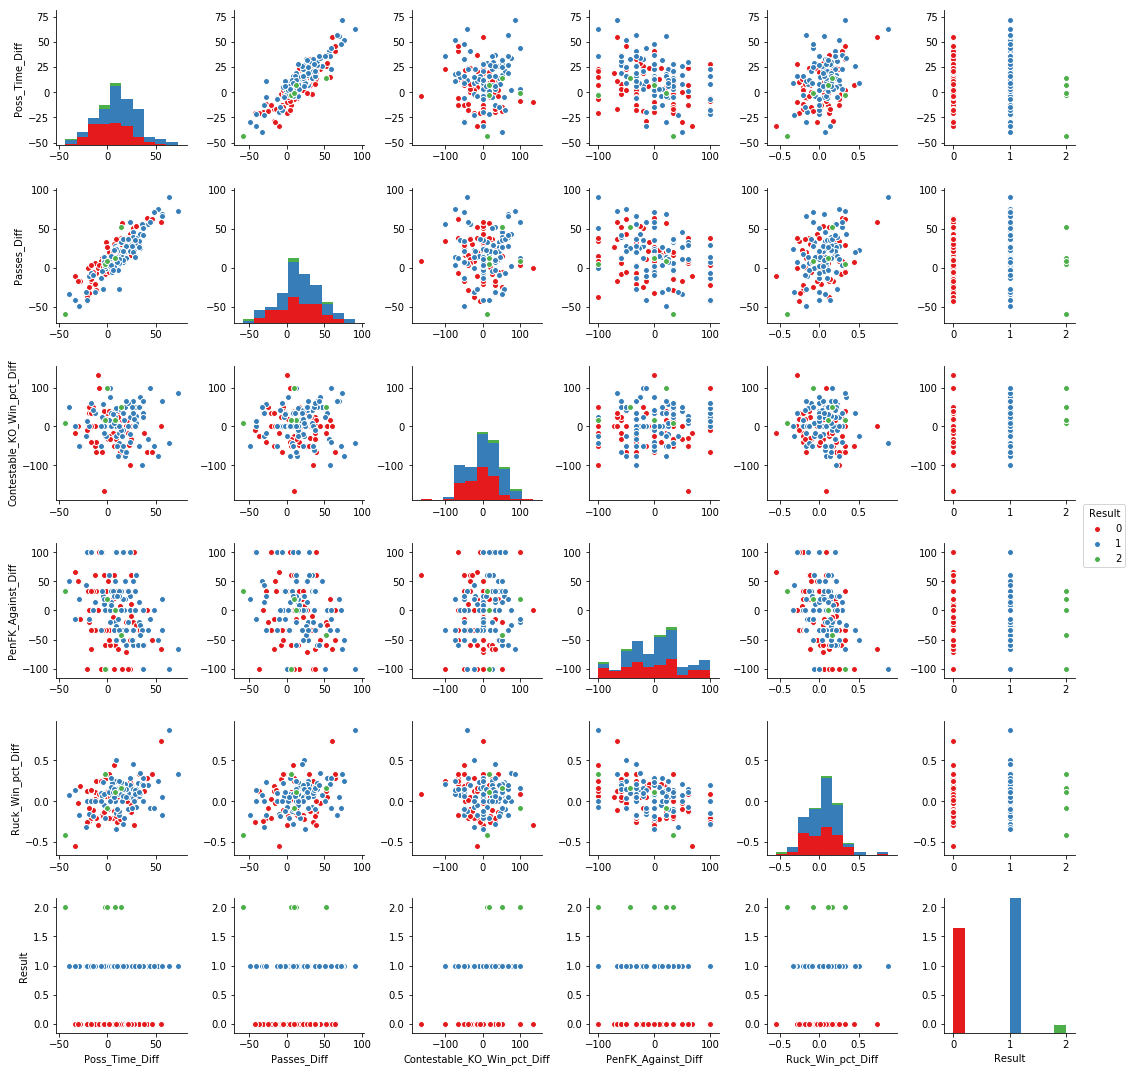

In [143]:
#experiment with relationships of "important" features
sns.pairplot(impt,hue='Result', palette='Set1') #hue='Result'

## Random Forest Model Eval

In [144]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#Output confusion matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,rfc_pred))

#Create a Comfusion MAtrix plot - not neccessary
#import matplotlib.pyplot as plt
#print("\n")
#print("Confusion Matrix Plot")
#from sklearn.metrics import confusion_matrix
#conf = confusion_matrix(y_test,rfc_pred)
#plt.imshow(conf, cmap='binary', interpolation='None')
#plt.show()

#import libraries to ignore UndefinedMetricWarning
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

#get the model's accuracy score
accuracy_score(y_test, rfc_pred)
print("\n")
print("Classification Report")
print(classification_report(y_test,rfc_pred))

#print accuracy score
print("\n")
print("Accuracy Score")
print(rfc.score(X_test, y_test))

Confusion Matrix
[[12  8]
 [ 8 18]]


Classification Report
             precision    recall  f1-score   support

          0       0.60      0.60      0.60        20
          1       0.69      0.69      0.69        26

avg / total       0.65      0.65      0.65        46



Accuracy Score
0.652173913043


In [145]:
#Find Feature Importances
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

print("Feature Importance")
print(feature_importances)

Feature Importance
                             importance
Poss_Time_Diff                 0.161729
Passes_Diff                    0.145352
Contestable_KO_Win_pct_Diff    0.123623
PenFK_Against_Diff             0.113311
Ruck_Win_pct_Diff              0.112042
RuckMaul_Diff                  0.079822
Lineout_Win_Pct_Diff           0.072594
Scrum_Win_Pct_Diff             0.058048
Cards_diff                     0.033166
-74 : -25                      0.027678
0 : 25                         0.018821
51 : 75                        0.016534
26 : 50                        0.015968
-24 : -1                       0.006553
-99 : -75                      0.004287
-124 : -100                    0.003880
126 : 150                      0.002235
-175 : -150                    0.002202
76 : 100                       0.002155
101 : 125                      0.000000
-149 : -125                    0.000000


## Train an XGBoost Classifier Model
Info from https://jessesw.com/XG-Boost/

In [146]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

#grid_search

## Set up hyperparameter tuning/Grid Search¶

In [162]:
#Set parameters for first grid search. Start tuning on the maximum depth of the trees first, 
#along with the min_child_weight, which is very similar to min_samples_split in sklearn’s version 
#of gradient boosted trees. We set the objective to ‘binary:logistic’ since this is a binary 
#classification problem
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 100, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 
# Optimize for accuracy

In [163]:
# Run the grid search
optimized_GBM.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [164]:
# Check grid scores (see deprecation warning - change from grid_scores_ to cv_results_ attribute
optimized_GBM.grid_scores_
# score decreased from RF to 62% from 71%:
# mean: 0.61905, std: 0.08127, params: {'max_depth': 3, 'min_child_weight': 3}

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.59048, std: 0.09253, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.56190, std: 0.09835, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.56190, std: 0.10495, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.57143, std: 0.08073, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.55238, std: 0.08441, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.56190, std: 0.10495, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.57143, std: 0.08073, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.55238, std: 0.08441, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.56190, std: 0.10495, params: {'max_depth': 7, 'min_child_weight': 5}]

use these parameters (resulting in mean: 0.59048):

mean: 0.59048, std: 0.09253, params: {'max_depth': 3, 'min_child_weight': 1}

** params: {'max_depth': 3, 'min_child_weight': 1} **

Adjust subsampling along with lowering the learning rate to see if that helps

In [171]:
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 100, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 1}


optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1)
# Run the grid search again
optimized_GBM.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.01], 'subsample': [0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [172]:
# check the Grid Scores again - increased to 0.66667 by tweaking parameters
# Increased CV folds to cv=11, 'max_depth': 5, 'min_child_weight': 5
# mean: 0.66667, std: 0.13718, params: {'learning_rate': 0.01, 'subsample': 0.7}
optimized_GBM.grid_scores_

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.55238, std: 0.11011, params: {'learning_rate': 0.1, 'subsample': 0.7},
 mean: 0.59048, std: 0.09253, params: {'learning_rate': 0.1, 'subsample': 0.8},
 mean: 0.55238, std: 0.10111, params: {'learning_rate': 0.1, 'subsample': 0.9},
 mean: 0.57143, std: 0.13673, params: {'learning_rate': 0.01, 'subsample': 0.7},
 mean: 0.55238, std: 0.16008, params: {'learning_rate': 0.01, 'subsample': 0.8},
 mean: 0.57143, std: 0.13673, params: {'learning_rate': 0.01, 'subsample': 0.9}]

### Final parameters:
Got to 67% (mean: 0.66667, std: 0.13718) with the parameters below:

params: {'learning_rate': 0.01, 'subsample': 0.7, 'max_depth': 5, 'min_child_weight': 5}

ind_params = {'n_estimators': 100, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 5, 'min_child_weight': 5}

## Create a DMatrix
To increase the performance of XGBoost's speed through many iterations of the training set, and since we are using only XGBoost's API and not sklearn's anymore, we can create a DMatrix. This sorts the data initially to optimize for XGBoost when it builds trees, making the algorithm more efficient. This is especially helpful when you have a very large number of training examples. To create a DMatrix:

In [1]:
# Won't work because labels are not 0,1
# Create our DMatrix to make XGBoost more efficient
#xgdmat = xgb.DMatrix(X_train, y_train) 